****<h1 style=text-align:center>Practical-14</h1>****

**1)Write a Python program to implement a machine learning algorithm for
given dataset. (It is recommended to assign different machine learning algorithms group wise – micro project)**

**<h3 style=text-align:center>Project Name: Heart Disease Prediction</h3>**

**<h3 style=text-align:center>Members: Harsh Rajyguruh and Nayan Gohel</h3>**

**<h3 style=text-align:center>Enrollments: 216270307031,216270307036</h3>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Heart Disease dataset
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv("../input/heart-disease/dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


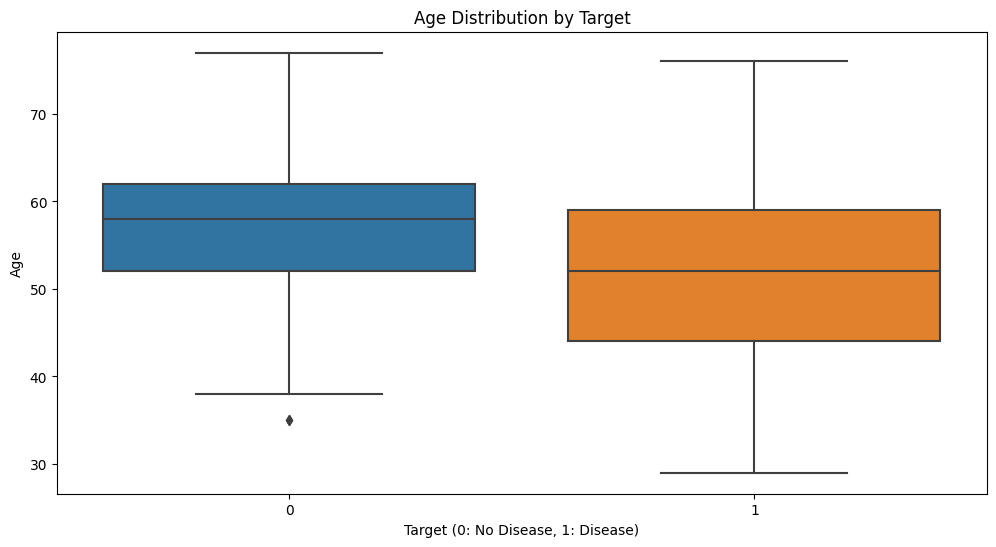

In [4]:
# Visualize data distributions and relationships
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title("Age Distribution by Target")
plt.xlabel("Target (0: No Disease, 1: Disease)")
plt.ylabel("Age")
plt.show()

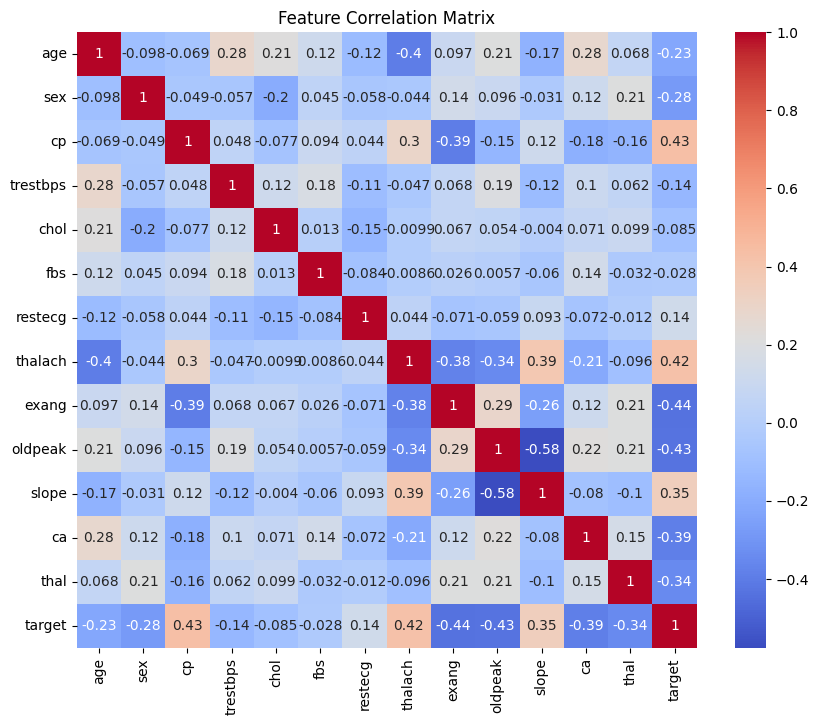

In [5]:
# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [6]:
# Data Preprocessing:
# Handle missing values by removing rows with missing values
df.dropna(inplace=True)

In [7]:
# Encode categorical variables
# You can use one-hot encoding or label encoding depending on the dataset.
# Split the data into features (X) and the target (y)
X = df.drop("target", axis=1)
y = df["target"]

In [8]:
# Normalize features (you can use Min-Max scaling for this)
X = (X - X.min()) / (X.max() - X.min())

In [9]:
# Split the data into a training set and a testing set
X_train = X.sample(frac=0.8, random_state=1)
X_test = X.drop(X_train.index)
y_train = y.loc[X_train.index]
y_test = y.loc[X_test.index]

In [10]:
# Logistic Regression Model
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

def train_logistic_regression(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)

    for _ in range(num_iterations):
        model = predict(X, weights)
        gradient = np.dot(X.T, (model - y)) / num_samples
        weights -= learning_rate * gradient

    return weights

In [11]:
# Train the logistic regression model
learning_rate = 0.1
num_iterations = 1000
trained_weights = train_logistic_regression(X_train.values, y_train.values, learning_rate, num_iterations)

In [12]:
# Make Predictions
def predict_class(X, weights, threshold=0.5):
    probabilities = predict(X, weights)
    return [1 if p > threshold else 0 for p in probabilities]

y_pred = predict_class(X_test.values, trained_weights)

In [13]:
# Accuracy
accuracy = np.mean(y_pred == y_test.values)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 91.80%
